# Charge Reasoning I
## PH 212 COCC
### Bruce Emerson 6/6/2020

It is a basic tenant of physics teaching that one of the things which is often hard to learn is to reason quantitatively without numbers. This is often relevant when we know the relationship between the outcome and the characteristics of the problem that affect that outcome. In the case of charge we (hopefully) understand conceptually that changing the magnitude of either charge changes the amount of force they each experience and that the distance between the charges (or the centers of spherical distributions of charge) also affects the force. The force depends on the inverse of the square of the distance.

This notebook is an attempt to provide some direct practice with those concepts.

## Dependencies

This is my usual spectrum of dependencies that seem to be generally useful. We'll see if I need additional ones.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
#from numpy.random import default_rng
#rng = default_rng()

## Reference Point

Assume that $F_1$ is the force between two identical charges of magnitude Q = 2 a distance r = 4 apart. Run the cell below to generate two additional charges and plot them on the graph. What is the Force between the two lower charges compared to $F_1$?

To get the most out of this exercise minimize the next cell (click on the bar to the left) and the run the cell to generate a problem that will be plotted below.


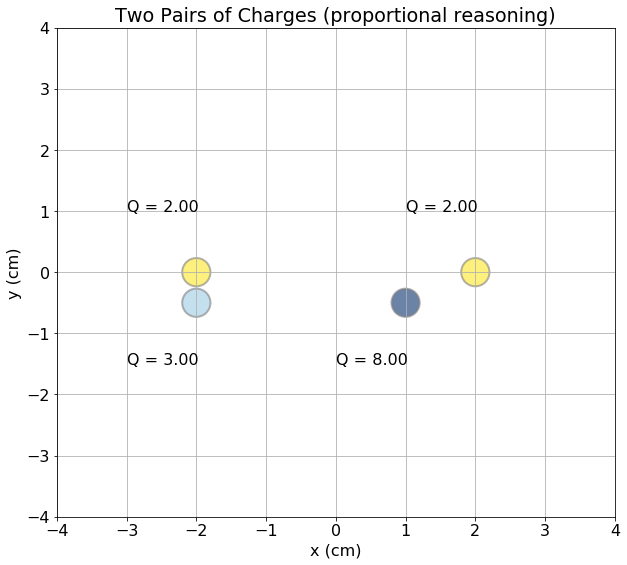

In [5]:
# Generate the problem
# Begin with the reference charges -- manually set in the begining
# reference charge locations
xchargeref1 = 2.
xchargeref2 = -2.
ychargeref1 = 0.
ychargeref2 = 0.
rseparationref = np.sqrt((xchargeref1-xchargeref2)**2 + (ychargeref1 - ychargeref2)**2)

# 'size of reference charged object'
Rsphere1 = 4.
Rsphere2 = 4.
Rscale = 200.  # potential scaling value for plot

# charge on reference objects in arbitrary units
Qcharge1 = 2.0
Qcharge2 = 2.0
Qscale = .5   # potential scaling value for plot

# Create the other pair of charges to compare to the reference above
# randomly generate challenge charges - 'old' version: np.random.randint(2, size=10)

xchallenge1 = -np.random.randint(10) # generate an integer between 0 and 9
xchallenge2 = np.random.randint(10) # generate an integer between 0 and 9
ychallenge1 = -0.5 # 
ychallenge2 = -0.5 # 
rchallenge = np.sqrt((xchallenge1-xchallenge2)**2 + (ychallenge1 - ychallenge2)**2)
# print("Challenge Locations ",xchallenge1,xchallenge2,ychallenge1,ychallenge2)

# generate challenge charges np.random.randint(2, size=10)
Qchallenge1 = np.random.randint(10) # generate an integer between 0 and 9
Qchallenge2 = np.random.randint(10) # generate an integer between 0 and 9

# print("Challenge Charges ",Qchallenge1,Qchallenge2)

# 'size of reference charged object'
Rspherechal1 = 4.
Rspherechal2 = 4.
Rscalechallenge = 200.  # potential scaling value for plot

refForce = Qcharge1*Qcharge2/(rseparationref**2)
challengeForce = Qchallenge1*Qchallenge2/(rchallenge**2)
ratio = challengeForce/refForce
# print("F1 ",refForce)
# print("challengeForce ",challengeForce)
# print("ratio ",ratio)

# create data for reference plot -- first element is always 0,0 with 0 charge and size
# the first element helps the color mapping behave more nicely
xr = [0.,xchargeref1, xchargeref2]
yr = [0.,ychargeref1,ychargeref2]
zr = [0.,Rsphere1*Rscale,Rsphere2*Rscale]
mr = [0.,Qcharge1,Qcharge2]

# create data for challenge plot -- first element is always 0,0 with 0 charge and size
xc = [0.,xchallenge1,xchallenge2]
yc = [0.,ychallenge1,ychallenge2]
zc = [0.,Rspherechal1*Rscalechallenge,Rspherechal2*Rscalechallenge]
mc = [0.,Qchallenge1,Qchallenge2]

# Let the plotting begin!!
fig2, ax2 = plt.subplots()

# Change color with c and alpha. I map the color to the charge value with m axis value.
ax2.scatter(xr, yr, s=zr*2000, c=mr, cmap='viridis', 
            alpha=0.6, edgecolors="grey", linewidth=2, label = "reference")
ax2.scatter(xc, yc, s=zc*2000, c=mc, cmap='Blues', 
            alpha=0.6, edgecolors="grey", linewidth=2, label = "challenge")

# organize limits
xall = np.concatenate((xr,xc)) # collect all of the x values
yall = np.concatenate((yr,yc)) # collect all of the y values
xmax = np.max(xall)
xmin = np.min(xall)
ymax = np.max(yall)
ymin = np.min(yall)
# generate some plot space around the limits
xlimH = xmax +rseparationref/2.
xlimL = xmin-rseparationref/2.
ylimH = ymax +rseparationref/2.
ylimL = ymin-rseparationref/2.
plt.ylim(xlimL, xlimH)
plt.xlim(xlimL, xlimH)


# Add titles (main and on axis)
plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='x (cm)', ylabel='y (cm)',
       title='Two Pairs of Charges (proportional reasoning)')
# label the charges
offset = 1.
labelref1 = ("Q = %.2f" % Qcharge1)
labelref2 = ("Q = %.2f" % Qcharge2)
labelchal1 = ("Q = %.2f" % Qchallenge1)
labelchal2 = ("Q = %.2f" % Qchallenge2)
ax2.text(xchargeref1-offset, ychargeref1 + offset, labelref1)
ax2.text(xchargeref2-offset, ychargeref2 + offset, labelref2)
ax2.text(xchallenge1-offset, ychallenge1 - offset, labelchal1)
ax2.text(xchallenge2-offset, ychallenge2 - offset, labelchal2)

fig2.set_size_inches(10, 9)
# ax2.legend(loc= 2)
ax2.grid()
plt.show()

#fig2.savefig('chargereasonI.png')

## Your Answer!

Execute the cell below to check your answer. If you don't get it right you can rerun this cell and try again. The problem will remain static until you rerun the cell above this.

To get the most out of this exercise minimize the next cell (click on the bar to the left) and the run the cell to generate a problem that will be plotted below.

In [5]:
# get student result
print("Enter the ratio of the new force relative to F1 - the reference force.")
print("Your result should be entered with 2 decimal places.")
studentresult = float(input("Enter your result: "))

# check result relative to answer
closeness = np.absolute(1.0 - (studentresult/ratio))
if closeness < 0.01:
    print("Yay, you nailed it!")
else:
    if closeness < 0.05:
        print("You are within 5% which could just be rounding errors. ")
    else:
        if closeness < 0.2:
            print("You are within 20% which feels like you're doing it right. Check numbers. ")
        else:
            print("Probably need to run the numbers again or generate a new problem. ")
    
print("Practice makes perfect")


Enter the ratio of the new force relative to F1 - the reference force.
Your result should be entered with 2 decimal places.


Enter your result:  .306


Yay, you nailed it!
Practice makes perfect


## Practice!!

Rinse and repeat until you get it right a couple of times in a row.